# 머신러닝/딥러닝 알고리즘으로 GNI Corpus의 Subjectivity주관성 판별하기

## - 목적
논문은 사실만을 작성하며 주관성은 배제해야 한다. 하지만 모든 것을 한꺼번에 고려할 능력이 갖추어지지 못하는 인간의 특성 상 은연 중에 주관을 포함한 단어들이나 어휘들을 이용하기 마련이다. 예를 들면, 결과가 나아졌다는 표현은 객관적인 범위일 수 있으나, 결과가 좋았다와 같은 애매하고 주관적인 표현은 논문의 객관성을 해칠 수 있다고 생각하여 이를 나타내보고자 하였다.  

이 프로젝트를 통해 **GNI Corpus에서의 각 논문들의 주관성 여부를 파악하고 이들을 점수화**하고자 한다.  
머신러닝/딥러닝 알고리즘을 모두 적용하고 싶어 두 섹션(**Machine Learning 섹션/Deep Learning 섹션**)으로 나누어 코퍼스에 적용하고자 한다.  



## - 목차
GNI Corpus에 적용하기 위해 학습된 모델을 준비해야 한다.  
머신러닝 알고리즘, 딥러닝에서 각각 하나의 모델을 만들고자 한다.  
  

먼저 머신러닝 알고리즘 섹션은 무작정 하나의 알고리즘을 적용하기보다는 가장 높은 정확도를 보이는 모델을 고르고 싶어  
**여러가지 모델 중 하나를 고르는 Model Selection 과정**을 넣었다.  
  
이를 적용한 목차는 다음과 같다.
#### - Machine Learning 섹션  
    1. 최적의 머신러닝 알고리즘 선택하기  
        1-1. Data Preprocessing  (NLTK Subjectivity Corpus)  
        1-2. Model Selection  
        1-3. Evaluation  
    2. GNI Corpus에 적용하기  
        2-1. Data Preprocessing  (GNI Corpus)  
        2-2. 최종 알고리즘 불러오기  
        2-3. GNI Corpus 분석하기



다음으로, 딥러닝 섹션에는 전 과제에서 배운 **BERT 모델을 이 binary classification에 이용**하고자 한다. 이를 적용한 목차는 다음과 같다.
#### - Deep Learning: BERT 섹션
    1. Data Preprocessing (NLTK Subjectivity Corpus)  
    2. Fine Tuning BERT Model
    3. GNI Corpus에 적용하기

다음과 같은 목차로 진행하고자 한다.  
  

### - 시작하기 전에..
코드를 진행하기에 앞서, 완전한 모델을 만들기 위해 완벽한 데이터셋이 필요할 것이다. 필자는 [NLTK의 Subjectivity Corpus](http://www.nltk.org/howto/corpus.html)를 택하였다.  
이유는 다음과 같다.


> 데이터셋의 조건 
1. 분류된 데이터 간의 갯수 조화(클래스 별 데이터 갯수 1:1의 비율) 
2. 충분한 데이터 갯수(최소 10000장) 
3. 정확한 데이터값(잘못된 값이 없는지)

  
 Subjectivity Corpus는 *5000 subjective and 5000 objective processed sentences*를 갖추어 1번과 2번의 조건을 충족하고,   
 NLTK Corpus인 만큼 3번의 조건도 충족한다고 판단하였다.  

이에, NLTK Subjectivity Corpus를 통해 알고리즘들의 정확도를 판단하고자 한다.


In [32]:
"""시작하기 전, Corpus 정보를 부르기 위한 Mount Google Drive 설정"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Machine Learning 섹션

## 1. 최적의 머신러닝 알고리즘 선택하기

### 1-1. Data Preprocessing

앞서 나타낸 바와 같이, NLTK의 Subjectivity Corpus를 이용하기로 한다.  
기본적으로 데이터를 준비하는데 필요한 처리를 행하였다.



In [33]:
from nltk.corpus import subjectivity
import pandas as pd
from nltk.tokenize import sent_tokenize
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,accuracy_score, log_loss
import warnings
warnings.filterwarnings(action='ignore')

In [34]:
import nltk
nltk.download('subjectivity') #Subjectivity 코퍼스 다운받기

[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!


True

In [35]:
"""GNI Corpus와 동일하게 문장 단위로 분류"""
obj_raw = subjectivity.raw(categories='obj').split('\n') #문장 분리 
sub_raw = subjectivity.raw(categories='subj').split('\n') 
obj_raw = [x for x in obj_raw if (x != '' and len(x) > 40 )] #문장의 길이를 고려하여 전처리하였다.
sub_raw = [x for x in sub_raw if (x != '' and len(x) > 40 )]

In [36]:
"""objective 문장은 0, Subjective 문장은 1로 설정하여 전체 데이터 정렬"""
obj_docs = [[sent, 0] for sent in obj_raw] #objective
subj_docs = [[sent, 1] for sent in sub_raw] #subjectivity
list_data = obj_docs+subj_docs
da = shuffle(list_data)

In [37]:
"""하나의 데이터셋으로 만들고 무작위로 섞어준다."""
obj = pd.DataFrame(obj_docs, columns = ['sentence', 'subj'])
subj= pd.DataFrame(subj_docs, columns = ['sentence', 'subj'])
data = pd.concat([obj, subj])
df = shuffle(data) #가지고 있는 최종 데이터셋(Train+Test)
df #최종 데이터셋 df

,sentence,subj
3442,"eight year old maria has her bicycle stolen , ...",0
4946,"an entertaining , grimy view of the traps of m...",1
2313,"willy , on impulse , takes her captive and mur...",0
2054,"nicklas passes out , and the next day when he ...",0
647,even people clueless about skateboarding can e...,1
...,...,...
2684,astonishingly skillful and moving . . . it cou...,1
2941,soon jonah embarks on an adventure that leads ...,0
1650,paco ( debora falabella ) and tonho ( roberto ...,0
4360,director nolan shows here he can handle clever...,1


In [38]:
"""Train:Test=80:20 비율로 나누어 split해준다."""
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=12)

1-1. Data Preprocessing 과정을 통해 Model 학습시 필요한 X_train, test시 필요한 X_test 데이터를 모두 정렬하였다.

### 1-2. Model Selection

앞서 준비한 X_train데이터 셋을 머신러닝 알고리즘에 적용해보자. Classification에 사용되는 일반적인 알고리즘들을 택하였다.  
머신러닝 알고리즘들은 Sci-kit Learn 라이브러리를 이용해 Pipeline을 구축하였다.

**적용할 알고리즘 종류**는 다음과 같다.

*  머신러닝 알고리즘
    1. SVM(Support Vector Machine)
    2. Naive Bayes
    3. Random Forest
    4. MLPClassifier
  

**알고리즘 성능 판별 기준**은 다음과 같다.
- Accuracy
- F1-Score

  
각 알고리즘을 이용해 클래스를 작성하고, X_train을 통해 모델을 학습한다.  
학습된 모델을 X_test에 적용하고 위의 성능 판별 기준을 통해 정확도를 받는다.

In [39]:
# 알고리즘 평가 지표 결과들을 담을 배열 세팅
acc_scores = []
f1_scores = []
pd.set_option('mode.chained_assignment',  None)

#### SVM(Support Vector Machine)을 이용한 SVMSubjectivity 클래스



*   Support Vector Machine이란?   
주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델  
(boundary를 기준으로 inlier에 속하는 데이터셋 개수를 조정해가면서 정확도가 올라가는 형식으로 모델이 훈련된다.)

*   파라미터 조정
    - kernel = 'rbf': Linear보다는 비선형의 구조가 데이터 일반화에 더 적합하다고 판단





In [40]:
class SVMSubjectivity():
    """sklearn linear Support Vector Machine (SVM) Pipeline으로 주관성 정도를 예측해보자"""
    def __init__(self) -> None: 
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.svm import NuSVC
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()), #CountVectorizer로 BOW 벡터 생성
                ('tfidf', TfidfTransformer()), #TfidfTransformer로 단어의 가중치도 적용한 BOW 벡터 생성
                ('clf', NuSVC(
                    kernel = 'rbf',
                )),
            ]
        )
        
    def predict(self) -> pd.DataFrame:
        "sklearn pipeline을 이용한 모델 훈련"
        svm_learner = self.pipeline.fit(X_train['sentence'], X_train['subj'])
        # 예측 모델인 learner를 이용해 test 데이터를 예측한다.
        X_test['pred'] = svm_learner.predict(X_test['sentence'])
        return X_test
    
    def accuracy(self, X_test: pd.DataFrame) -> None:
        "accuracy와 F1-Score를 이용해 모델의 성능 판별"
        acc = accuracy_score(X_test['subj'], X_test['pred'])
        f1 = f1_score(X_test['subj'], X_test['pred'], average='macro')
        acc_scores.append(acc)
        f1_scores.append(f1)
        print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))

In [41]:
svm_pred = SVMSubjectivity().predict()
svm_accur = SVMSubjectivity().accuracy(X_test)

Accuracy: 0.894447223611806
Macro F1-score: 0.8944434197720289


#### NaiveBayes을 이용한 NaiveBayesSubjectivity 클래스
NaiveBayes에서도 *MultiNomial Naive Bayes 분류기*를 사용해본다.


*   MultiNomial Naive Bayes: 다항 모델을 위한 Naive Bayes 분류기  
텍스트 분류와 같은 discrete한 값들을 분류하는데 적합하므로 Original한 버전 보다는 MultiNomial한 Naive Bayes 분류기를 고르게 되었다.
*   파라미터 조정
    - alpha = 1.0: label smoothing에 도움(label을 0또는 1이 아닌, smooth하게 주어, 일반화에 좋다, 1이 일반적)
    - fit_prior = True: 사전 확률 여부이므로, True이 유리하다.


In [42]:
class NaiveBayesSubjectivity():
    """ sklearn Naive Bayes pipeline으로 주관성 정도를 예측해보자"""
    def __init__(self) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.naive_bayes import MultinomialNB
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(
                    alpha = 1.0,
                    fit_prior = True,
                )),
            ]
        )

        
    def predict(self) -> pd.DataFrame:
        "sklearn pipeline을 이용한 모델 훈련"
        nb_learner = self.pipeline.fit(X_train['sentence'], X_train['subj'])
        # 예측 모델인 nb_learner를 이용해 test 데이터를 예측한다.
        X_test['pred'] = nb_learner.predict(X_test['sentence'])
        return X_test
    
    def accuracy(self, X_test: pd.DataFrame) -> None:
       "accuracy와 F1-Score를 이용해 모델의 성능 판별"
       acc = accuracy_score(X_test['subj'], X_test['pred'])
       f1 = f1_score(X_test['subj'], X_test['pred'], average='macro')
       acc_scores.append(acc)
       f1_scores.append(f1)
       print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))

In [43]:
naive_pred = NaiveBayesSubjectivity().predict()
naive_accur = NaiveBayesSubjectivity().accuracy(X_test)

Accuracy: 0.9234617308654327
Macro F1-score: 0.9234589726309024
2.643576163170187


#### Random Forest를 이용한 RandomForestSubjectivity 클래스

- Random Forest: 훈련과정에서 구성한 다수의 Decision Tree결정 트리를 기반으로 그들의 평균치나 우세한 레이블을 출력해준다.
- 파라미터 조정
    - criterion = 'entropy': error에 반응하는 정도가 gini보다 entropy가 더 높다고 판단하여 조정하였다.
    - random_state = 42: seed를 맞추기 위한 설정


In [44]:
class RandomForestSubjectivity():
    """ sklearn Decision Tree결정트리 pipeline으로 주관성 정도를 예측해보자"""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(
                    max_features = 'auto',
                    criterion = 'entropy',
                    random_state = 42,
                    class_weight = "balanced"
                )),
            ]
        )

    def predict(self, lower_case: bool=False) -> pd.DataFrame:
        "sklearn pipeline을 이용한 모델 훈련"
        rf_learner = self.pipeline.fit(X_train['sentence'], X_train['subj'])
        # 예측 모델인 rf_learner 이용해 test 데이터를 예측한다.
        X_test['pred'] = rf_learner.predict(X_test['sentence'])
        return X_test
    
    def accuracy(self, X_test: pd.DataFrame) -> None:
       "accuracy와 F1-Score를 이용해 모델의 성능 판별"
       acc = accuracy_score(X_test['subj'], X_test['pred'])
       f1 = f1_score(X_test['subj'], X_test['pred'], average='macro')
       acc_scores.append(acc)
       f1_scores.append(f1)
       print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))

In [45]:
rf_pred = RandomForestSubjectivity().predict()
rf_accur = RandomForestSubjectivity().accuracy(X_test)

Accuracy: 0.8639319659829915
Macro F1-score: 0.8639033230208553


#### MLPClassifier를 이용한 MLPClassifierSubjectivity 클래스
- MLPClassifier: 사실 딥러닝쪽이지만 Sci-kit learn에서의 성능이 어느정도인지 궁금하여 추가하였다.
- 파라미터 조정
    - hidden_layer_sizes= (100,429): 무조건 높인다고 좋은게 아니라서 적당히 설정하였다.
    - solver= 'adam': 세 개의 후보('lbfgs','sgd') 중 성능이 가장 뛰어나서 골랐다.
    - activation = 'relu': 가장 나은 leaky relu가 없어서 relu를 골랐다.
    - alpha = 1e-5: 가장 일반적인 L2 일반화 값을 택하였다.

In [46]:
class MLPClassifierSubjectivity():
    """Predict fine-grained sentiment scores using a sklearn 
    linear Support Vector Machine (SVM) pipeline."""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.neural_network import MLPClassifier
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MLPClassifier(
                    solver='adam',
                    activation='relu',
                    hidden_layer_sizes = (100,429),
                    alpha=1e-5,
                    random_state=42
                )),
            ]
        )

        
    def predict(self, X_test: pd.DataFrame) -> pd.DataFrame:
        "sklearn pipeline을 이용한 모델 훈련"
        nb_learner = self.pipeline.fit(X_train['sentence'], X_train['subj'])
        # 예측 모델인 nb_learner를 이용해 test 데이터를 예측한다.
        X_test['pred'] = nb_learner.predict(X_test['sentence'])
        return X_test
    
    
    def accuracy(self, X_test: pd.DataFrame) -> None:
       "accuracy와 F1-Score를 이용해 모델의 성능 판별"
       acc = accuracy_score(X_test['subj'], X_test['pred'])
       f1 = f1_score(X_test['subj'], X_test['pred'], average='macro')
       acc_scores.append(acc)
       f1_scores.append(f1)
       print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))

In [47]:
mlp_pred = MLPClassifierSubjectivity().predict(X_test)
mlp_accur = MLPClassifierSubjectivity().accuracy(X_test)

Accuracy: 0.9084542271135568
Macro F1-score: 0.90839223829332


### 1-3. 최종 알고리즘 선정을 위한 Accuracy, F1-Score 비교하기

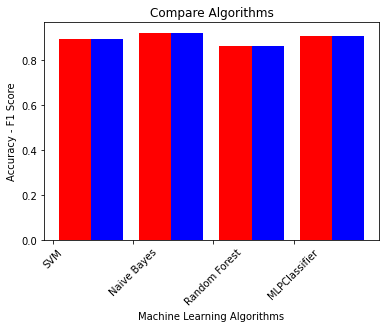

<Figure size 648x648 with 0 Axes>

In [61]:
from matplotlib import pyplot as plt
drinks = [ "SVM", "Naive Bayes", "Random Forest", "MLPClassifier"]
n = 1  
t = 2 
d = len(acc_scores) 
w = 0.8
store1_x = [t*element + w*n for element in range(d)]
plt.bar(store1_x, acc_scores,color = "red")
n = 2 
t = 2 
d = len(f1_scores) 
w = 0.8 
store2_x = [t*element + w*n for element in range(d)]
plt.bar(store2_x, f1_scores, color= "blue")
plt.xticks([i * 2 + 0.25 for i in range(len(drinks))], drinks, rotation=45)
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy - F1 Score")
plt.title("Compare Algorithms")
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.figure(figsize=(9,9))
plt.show()

#### 최종적으로 NaiveBayes 알고리즘이 선정되었다.  
Accuracy와 F1-Score 93%에 육박하는 높은 알고리즘인 MultiNomial Naive Bayes 분류기를 최종 알고리즘으로 선정한다.

## 2. GNI Corpus에 적용하기


### 2-1. 데이터 전처리하기

데이터 전처리는 다음과 같은 조건으로 시행하였다.
- \n 기준으로 raw 데이터를 분리
- 40자 안에 드는 문장은 제거
- 빈칸인 문장은 제거  

해당 기준은 밑에 알고리즘을 적용하기 전에 바로 적용하는 방식으로 적용하였다.

In [49]:
#GNI Corpus에 속하는 파일들 모두 부르기 (저장해둔 Google Drive 파일에서 부른다.)
import os
import nltk
from nltk.corpus import * 
import re
import shutil
import nltk
root = "/content/drive/My Drive/2020인공지능/sentence_tokenized2"
cor_root = os.listdir(root)

### 2-2. 최종 알고리즘 불러오기

최종 알고리즘으로 결정된 Naive Bayes 알고리즘을 불러오고, 전처리한 GNI Corpus에 이를 적용하고자 한다.


In [120]:
#위에 정의한 Multinomial NB와 동일한 코드이다.
class NaiveBayesSubjectivity():
    """ sklearn Naive Bayes pipeline으로 주관성 정도를 예측해보자"""
    def __init__(self) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.naive_bayes import MultinomialNB
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(
                    alpha = 1.0,
                    fit_prior = True,
                )),
            ]
        )
        
    def predict(self, X_test: pd.DataFrame) -> pd.DataFrame:
        "sklearn pipeline을 이용한 모델 훈련"
        nb_learner = self.pipeline.fit(X_train['sentence'], X_train['subj'])
        # 예측 모델인 nb_learner를 이용해 test 데이터를 예측한다.
        X_test['pred'] = nb_learner.predict(X_test['sentence'])
        return X_test
    
    def accuracy(self) -> None:
       "accuracy와 F1-Score를 이용해 모델의 성능 판별"
       acc = accuracy_score(X_test['subj'], X_test['pred'])
       f1 = f1_score(X_test['subj'], X_test['pred'], average='macro')
       log = log_loss(X_test['subj'], X_test['pred'])
       acc_scores.append(acc)
       f1_scores.append(f1)
       print("Accuracy: {}\nMacro F1-score: {}\nLog Score: {}".format(acc, f1, log))

In [121]:
gniCorpus = nltk.corpus.PlaintextCorpusReader(root,".*\.txt", encoding="utf-8")
obj_raw = gniCorpus.raw().split('\n')
gniraw = [x for x in obj_raw if ((x != '') and (len(x) > 40))]
gni = pd.DataFrame(gniraw, columns = ['sentence'])
naive_accur = NaiveBayesSubjectivity().accuracy()

Accuracy: 0.9234617308654327
Macro F1-score: 0.9234589726309024
Log Score: 2.643576163170187


위에서 정해준 root를 바탕으로 각 파일(item)에 for문으로 접속한다.  
  
for문 안에서,  
*   들어온 파일 내용에 전처리를 해주고, Naive Bayes 알고리즘을 적용하는 방식으로 작성하였다.
*   해당 알고리즘으로 나오는 Subjective 문장의 개수를 이용해 전체 Objective 문장한 비율을 구한다.  
  
이를 통해 각 파일의 Objective 비율을 구해준다.  
해당 비율이 높을수록 Objective하고, 낮을 수록 Subjective하다. 즉, 옳지 않다.

In [122]:
data={}
for item in cor_root:
    gniCorpus = nltk.corpus.PlaintextCorpusReader(root,item, encoding="utf-8")
    """파일 내용을 부르고 전처리 과정을 거친다."""
    obj_raw = gniCorpus.raw().split('\n')
    gniraw = [x for x in obj_raw if ((x != '') and (len(x) > 40))]
    """적용할 데이터를 gni DataFrame에 저장해준다."""
    gni = pd.DataFrame(gniraw, columns = ['sentence'])
    naive_pred = NaiveBayesSubjectivity().predict(gni) #Naive Bayes 분류기를 적용한다.
    data.update({item : gni['pred'].value_counts('0')[0]}) #Objective 문장 / 전체 문장 비율을 저장한다.
data

{'gni-10-1-1.txt': 0.4519230769230769,
 'gni-10-1-16.txt': 0.6690647482014388,
 'gni-10-1-23.txt': 0.6747967479674797,
 'gni-10-1-33.txt': 0.7625,
 'gni-10-1-40.txt': 0.6979166666666666,
 'gni-10-1-44.txt': 0.27205882352941174,
 'gni-10-1-51.txt': 0.26344086021505375,
 'gni-10-1-58.txt': 0.33035714285714285,
 'gni-10-1-65.txt': 0.625,
 'gni-10-1-9.txt': 0.4609375,
 'gni-10-2-106.txt': 0.35714285714285715,
 'gni-10-2-110.txt': 0.7142857142857143,
 'gni-10-2-117.txt': 0.4431818181818182,
 'gni-10-2-123.txt': 0.38333333333333336,
 'gni-10-2-128.txt': 0.3888888888888889,
 'gni-10-2-69.txt': 0.4020618556701031,
 'gni-10-2-74.txt': 0.6218487394957983,
 'gni-10-2-81.txt': 0.42038216560509556,
 'gni-10-2-88.txt': 0.573170731707317,
 'gni-10-2-99.txt': 0.6346153846153846,
 'gni-10-3-133.txt': 0.6318681318681318,
 'gni-10-3-145.txt': 0.44680851063829785,
 'gni-10-3-153.txt': 0.4927007299270073,
 'gni-10-3-167.txt': 0.7634408602150538,
 'gni-10-3-175.txt': 0.6720430107526881,
 'gni-10-3-184.txt':

### 2-3. 주관성을 띄는 Corpus
상위 5개 파일과 하위 5개 파일에서 주로 사용되는 Subjective한 표현들을 조사해보고자 한다.  
이 때, WordCloud를 적용해 많이 사용되는 단어들을 조사한다.

In [56]:
!pip install wordcloud
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

전체 파일 중 Objective 비율이 높은 상위 5개 파일을 출력해보자

In [52]:
import operator
objective = [] #상위 5개 파일 이름 저장
sorted_data_up = sorted(data.items(), key = operator.itemgetter(1), reverse = True)
for i in range(1,6,1):
    print(sorted_data_up[i])
    objective.append(sorted_data_up[i][0])

('gni-16-2-36.txt', 0.8488372093023255)
('gni-11-2-99.txt', 0.8333333333333334)
('gni-16-4-e35.txt', 0.82)
('gni-17-2-e18.txt', 0.7967032967032966)
('gni-16-3-65.txt', 0.78125)


전체 파일 중 Subjective 비율이 높은 상위 5개 파일을 출력해보자

In [53]:
subjective = [] # 하위 5개 파일을 저장한다.
sorted_data_down = sorted(data.items(), key = operator.itemgetter(1), reverse = True)
for i in range(-1,-6,-1):
    print(sorted_data_down[i])
    subjective.append(sorted_data_down[i][0])

('gni-11-2-97.txt', 0.16666666666666666)
('gni-11-4-163.txt', 0.25)
('gni-10-1-51.txt', 0.26344086021505375)
('gni-10-1-44.txt', 0.27205882352941174)
('gni-16-4-e38.txt', 0.2962962962962963)


Subjective 비율이 높은 상위 5개의 코퍼스의 문장들 중 Subjective한 문장들을 모아서 Subjective한 표현들을 보고자 한다.

In [54]:
subj=[]
for item in subjective:
    gniCorpus = nltk.corpus.PlaintextCorpusReader(root,item, encoding="utf-8")
    obj_raw = gniCorpus.raw().split('\n')
    gniraw = [x for x in obj_raw if (x != '' and len(x) > 40) and ('Title' not in x)]
    gni = pd.DataFrame(gniraw, columns = ['sentence'])
    naive_pred = NaiveBayesSubjectivity().predict(gni)
    subj = subj+ list(naive_pred['sentence'][naive_pred['pred']==1])

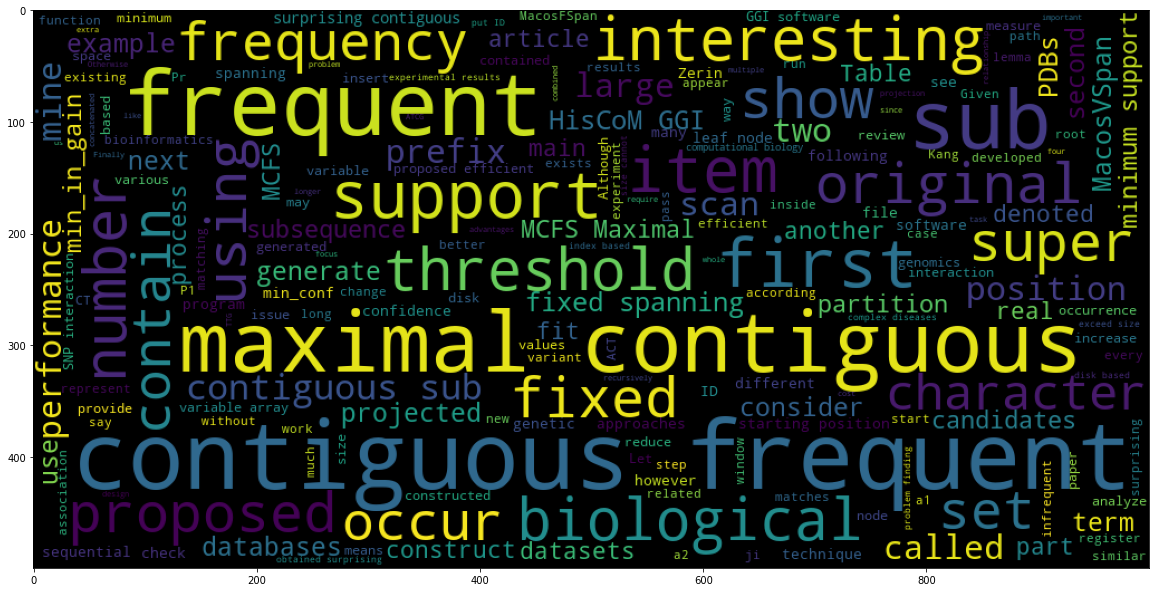

In [57]:
from wordcloud import WordCloud
#해당 단어들 사이에 주로 개념을 나타내는 단어들과 관사 단어들은 제거하고자 한다.
sw = stopwords.words('english')
stopwrds = ['data','drug','gene','study','cancer','clinical','model','Xn','methods','dataset','Therefore','features','including','models','structure','PubMed','matrix', 'information','research','analysis','result','annotation','performed','mutation','method','discovery','et','al','knowledge','text','CaGe','mutations','AML','NER','BioNLP','tensor','human','genomic','genes','novel','disease','decomposition','GSTM1','diesase','leukemia']
stopwrd = ['sequence','pattern','patterns','treatment','gene', 'genes','database','made','cell','Markov','used','development','tool','patients','word','features','ENCODE','suffix','one','KD','cells','protein','find','algorithm','candidate','mining','value','memory','approach','tree','suffixes','PDB','data','expression','result', 'tissue','Fig','length','et','al','codon','usage','sequences','time','tissues','level','DNA','also','levels','amino','acid','feature']
wordcloud = WordCloud(width = 1000, height = 500, stopwords = sw+stopwrd+stopwrds).generate(' '.join(subj))

plt.figure(figsize= (20,20))
plt.imshow(wordcloud)
plt.show()

Objective 비율이 높은 상위 5개의 코퍼스의 문장들 중 Subjective한 문장들을 모아서 Subjective한 표현들을 보고자 한다.

In [55]:
obj=[]
for item in objective:
    gniCorpus = nltk.corpus.PlaintextCorpusReader(root,item, encoding="utf-8")
    obj_raw = gniCorpus.raw().split('\n')
    gniraw = [x for x in obj_raw if (x != '' and len(x) > 40) and ('Title' not in x)]
    gni = pd.DataFrame(gniraw, columns = ['sentence'])
    naive_pred = NaiveBayesSubjectivity().predict(gni)
    obj = obj+ list(naive_pred['sentence'][naive_pred['pred']==1])

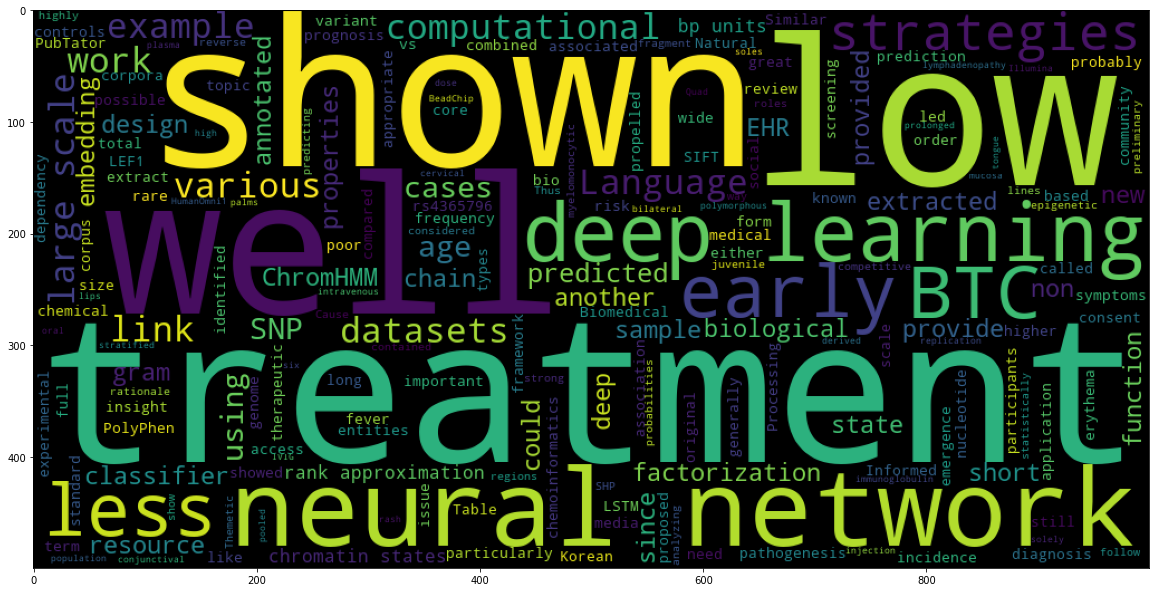

In [58]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords = sw+stopwrd+stopwrds).generate(' '.join(obj))
plt.figure(figsize= (20,20))
plt.imshow(wordcloud)
plt.show()

위의 두 WordCloud 결과를 보면 알수 있듯이, 형용사에서 나타나는 주관적인 표현이 논문의 객관성을 잃은 상황을 보여준다.  
이외의 다른 표현에는 영향이 많이 있지 않아보인다.  
확실히 subjective 비율이 높은 파일 기반의 wordcloud에서 subjective한 표현들이 더 많이 보이는 것을 알 수 있다.

# 딥러닝 알고리즘 섹션
##BERT를 통한 GNI Corpus에서의 Subjectivity 판별하기



저번 과제에 시행한 BERT 모델이 흥미로워 이를 통해 Subjectivity를 기획하기로 초반에 작업하였다.  
코드는 전 과제의 BERT 모델과 개인적으로 아는 지식들을 결합하여 작성하였다.

BERT의 구조를 참조해
*   Training시 NLTK의 Subjectivity Corpus를 통해, Subjectivity를 학습하고,
*   Fine-Tuning시 이를 GNI Corpus에 적용하고자 계획하였다.

이를 계획하여 짠 코드는 다음과 같다.




In [86]:
!pip install transformers

### 2-1. Data Preprocessing (NLTK Subjectivity Corpus)

In [87]:
"""GNI Corpus와 동일하게 문장 단위로 분류"""
obj_raw = subjectivity.raw(categories='obj').split('\n') #문장 분리 
subj_raw = subjectivity.raw(categories='subj').split('\n') 
obj_raw = [x for x in obj_raw if (x != '' and len(x) > 40 )] #문장의 길이를 고려하여 전처리하였다.
subj_raw = [x for x in subj_raw if (x != '' and len(x) > 40 )]

In [88]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from transformers import BertTokenizer, AdamW
from transformers import BertForSequenceClassification
from transformers import get_linear_schedule_with_warmup
values = []
tokens = []
ids = []
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [89]:
# token id들로 변환해주기
def encode_fn(text_list):
    all_input_ids = []    
    for text in text_list:
        input_ids = tokenizer.encode(
                        text,                      
                        add_special_tokens = True, 
                        max_length = 160,           
                        pad_to_max_length = True,
                        return_tensors = 'pt',
                        truncation=True  
                   )
        all_input_ids.append(input_ids)    
    all_input_ids = torch.cat(all_input_ids, dim=0)
    return all_input_ids

In [90]:
epochs = 4
batch_size = 32

# train 데이터와 Validation 데이터로 나누기
all_input_ids = encode_fn(subj_raw+obj_raw)

labels = [1 for x in range(len(obj_raw))]
labels += [0 for x in range(len(subj_raw))]
labels = torch.tensor(labels)

dataset = TensorDataset(all_input_ids, labels)
train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# train and validation dataloaders 만들기
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False)

### 2-2. Fine-Tuning BERT Model

In [91]:
#Transformers 라이브러리로 Pretrained된 BERT Model 부르기
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2, 
    output_attentions = False, 
    output_hidden_states = False, 
)

model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [92]:
# Optimizer와 critierion, total_steps, scheduler 정의하기
optimizer = AdamW(model.parameters(), lr = 2e-5)
criterion = torch.nn.CrossEntropyLoss()
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0,num_training_steps = total_steps)

In [97]:
#Training(Fine-tuning)
device = torch.device("cuda")
for epoch in range(epochs):    
    
    model.train()      
    total_loss, total_val_loss = 0, 0   
    for step, batch in enumerate(train_dataloader):     
        model.zero_grad()        
        loss, logits = model(batch[0].to(device), 
                             token_type_ids = None, 
                             attention_mask = (batch[0] > 0).to(device), 
                             labels = batch[1].to(device))
        
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

# Validation
    model.eval()
    for i, batch in enumerate(val_dataloader):
        with torch.no_grad():  
            loss, logits = model(batch[0].to(device), 
                                   token_type_ids = None, 
                                   attention_mask = (batch[0] > 0).to(device),
                                   labels = batch[1].to(device))
        total_val_loss += loss.item()
                    
    avg_train_loss = total_loss / len(train_dataloader)      
    avg_val_loss = total_val_loss / len(val_dataloader)     
    print('Train Loss     : ', avg_train_loss)
    print('Validation Loss: ', avg_val_loss)
    print('\n')

Train Loss     :  0.054207788581210455
Validation Loss:  0.10286979540251195


Train Loss     :  0.019702693147025063
Validation Loss:  0.1309861994232051


Train Loss     :  0.008781728876624506
Validation Loss:  0.13185044785495847


Train Loss     :  0.006365195003938657
Validation Loss:  0.13185044785495847




Train Loss와 Validation Loss를 보면, epoch = 0에서 1로 넘어갈 때 과적합이 되어 Loss가 증가한 경향을 볼 수 있다.  
Epoch = 0 ,즉 epoch수가 1일 때 일반화가 가장 잘되었다.  
이를 근거로 epochs를 1로 설정하여 다시 training시켜준다.

In [98]:
#Training(Fine-tuning)
epochs = 1
device = torch.device("cuda")
for epoch in range(epochs):    
    
    model.train()      
    total_loss, total_val_loss = 0, 0   
    for step, batch in enumerate(train_dataloader):     
        model.zero_grad()        
        loss, logits = model(batch[0].to(device), 
                             token_type_ids = None, 
                             attention_mask = (batch[0] > 0).to(device), 
                             labels = batch[1].to(device))
        
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

##### Validation #####
    model.eval()
    for i, batch in enumerate(val_dataloader):
        with torch.no_grad():  
            loss, logits = model(batch[0].to(device), 
                                   token_type_ids = None, 
                                   attention_mask = (batch[0] > 0).to(device),
                                   labels = batch[1].to(device))
        total_val_loss += loss.item()
                    
    avg_train_loss = total_loss / len(train_dataloader)      
    avg_val_loss = total_val_loss / len(val_dataloader)     
    print('Train Loss     : ', avg_train_loss)
    print('Validation Loss: ', avg_val_loss)
    print('\n')

Train Loss     :  0.007181055984155648
Validation Loss:  0.13185044785495847




### 2-3. GNI Corpus에 적용하기

위의 머신러닝 알고리즘에서 적용할 때와 같은 방식으로 GNI Corpus에 적용합니다.  
위와 동일한 과정을 통해 도출되므로 중복된 설명은 생략하였습니다.

In [102]:
import numpy as np
data={}
for item in cor_root:
    gniCorpus = nltk.corpus.PlaintextCorpusReader(root,item, encoding="utf-8")
    obj_raw = gniCorpus.raw().split('\n')
    gniraw = [x for x in obj_raw if (x != '' and len(x) > 40) and ('Title' not in x)]
    all_input_ids = encode_fn(gniraw)
    pred_data = TensorDataset(all_input_ids)
    pred_dataloader = DataLoader(pred_data, batch_size = batch_size, shuffle = False)
    model.eval()
    preds = []
    for i, (batch,) in enumerate(pred_dataloader):    
        with torch.no_grad():
            outputs = model(batch.to(device), 
                            token_type_ids = None, 
                            attention_mask = (batch > 0).to(device))

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        preds.append(logits)
        
    final_preds = np.concatenate(preds, axis=0)
    final_preds = np.argmax(final_preds, axis=1)
    data.update({item : np.count_nonzero(final_preds == 0)/len(final_preds)}) #Objective 문장 / 전체 문장 비율을 저장한다.

In [103]:
data

{'gni-10-1-1.txt': 0.85,
 'gni-10-1-16.txt': 1.0,
 'gni-10-1-23.txt': 0.9727272727272728,
 'gni-10-1-33.txt': 0.9866666666666667,
 'gni-10-1-40.txt': 0.967391304347826,
 'gni-10-1-44.txt': 0.8449612403100775,
 'gni-10-1-51.txt': 0.7417582417582418,
 'gni-10-1-58.txt': 0.9215686274509803,
 'gni-10-1-65.txt': 0.8717948717948718,
 'gni-10-1-9.txt': 0.9193548387096774,
 'gni-10-2-106.txt': 0.9850746268656716,
 'gni-10-2-110.txt': 1.0,
 'gni-10-2-117.txt': 0.8941176470588236,
 'gni-10-2-123.txt': 0.6694915254237288,
 'gni-10-2-128.txt': 0.9166666666666666,
 'gni-10-2-69.txt': 0.989247311827957,
 'gni-10-2-74.txt': 1.0,
 'gni-10-2-81.txt': 0.8321678321678322,
 'gni-10-2-88.txt': 1.0,
 'gni-10-2-99.txt': 1.0,
 'gni-10-3-133.txt': 0.9502762430939227,
 'gni-10-3-145.txt': 0.9851851851851852,
 'gni-10-3-153.txt': 0.9806201550387597,
 'gni-10-3-167.txt': 0.9886363636363636,
 'gni-10-3-175.txt': 0.9725274725274725,
 'gni-10-3-184.txt': 0.990909090909091,
 'gni-10-3-194.txt': 0.9340659340659341,
 '

전체 파일 중 Subjective 비율이 높은 상위 5개 파일을 출력해보자

In [106]:
subjective = [] # 하위 5개 파일을 저장한다.
sorted_data_down = sorted(data.items(), key = operator.itemgetter(1), reverse = True)
for i in range(-1,-6,-1):
    print(sorted_data_down[i])
    subjective.append(sorted_data_down[i][0])

('gni-11-1-55.txt', 0.6610169491525424)
('gni-11-1-58.txt', 0.6666666666666666)
('gni-11-2-97.txt', 0.6666666666666666)
('gni-10-2-123.txt', 0.6694915254237288)
('gni-17-2-e21.txt', 0.7123287671232876)


전체 파일 중 Objective 비율이 높은 상위 5개 파일을 출력해보자




In [104]:
objective = [] #상위 5개 파일 이름 저장
sorted_data_up = sorted(data.items(), key = operator.itemgetter(1), reverse = True)
for i in range(1,6,1):
    print(sorted_data_up[i])
    objective.append(sorted_data_up[i][0])

('gni-13-2-25.txt', 1.0)
('gni-12-4-247.txt', 1.0)
('gni-14-4-137.txt', 1.0)
('gni-13-4-152.txt', 1.0)
('gni-10-1-16.txt', 1.0)


# BERT Model 과 머신러닝 알고리즘 비교하기
- 최적의 머신러닝 알고리즘 MultiNomial NB Log loss: 2.643576163170187
- BERT Model Log Loss:   
    Train Loss     :  0.007181055984155648  
    Validation Loss:  0.13185044785495847

Log Loss들을 비교해보면 BERT Model이 훨씬 뛰어남을 알 수 있다.  
하지만 여기에 일치하는 Subjective, Objective 상위 5개 파일이 단 하나 있는 정황을 보면 Machine Learning 알고리즘이 생각보다 성능이 안 나온다는 결론을 짓게 되었다. 
